In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/shivanshmahajan/Desktop/Visa-Approval/.notebook/EasyVisa.csv")

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# exploring data

In [9]:
numerical=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical=[feature for feature in df.columns if df[feature].dtype == 'O']

print ( 'we have {} numerical features : {}'.format(len(numerical), numerical))
print ( 'we have {} categorical features : {}'.format(len(categorical), categorical))

we have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [14]:
for col in categorical :
    print(df[col].value_counts(normalize=True)*100)
    print("_____________________________________________")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
_____________________________________________
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
_____________________________________________
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
_____________________________________________
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
_____________________________________________
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype:

# univariate analysis in numerical features

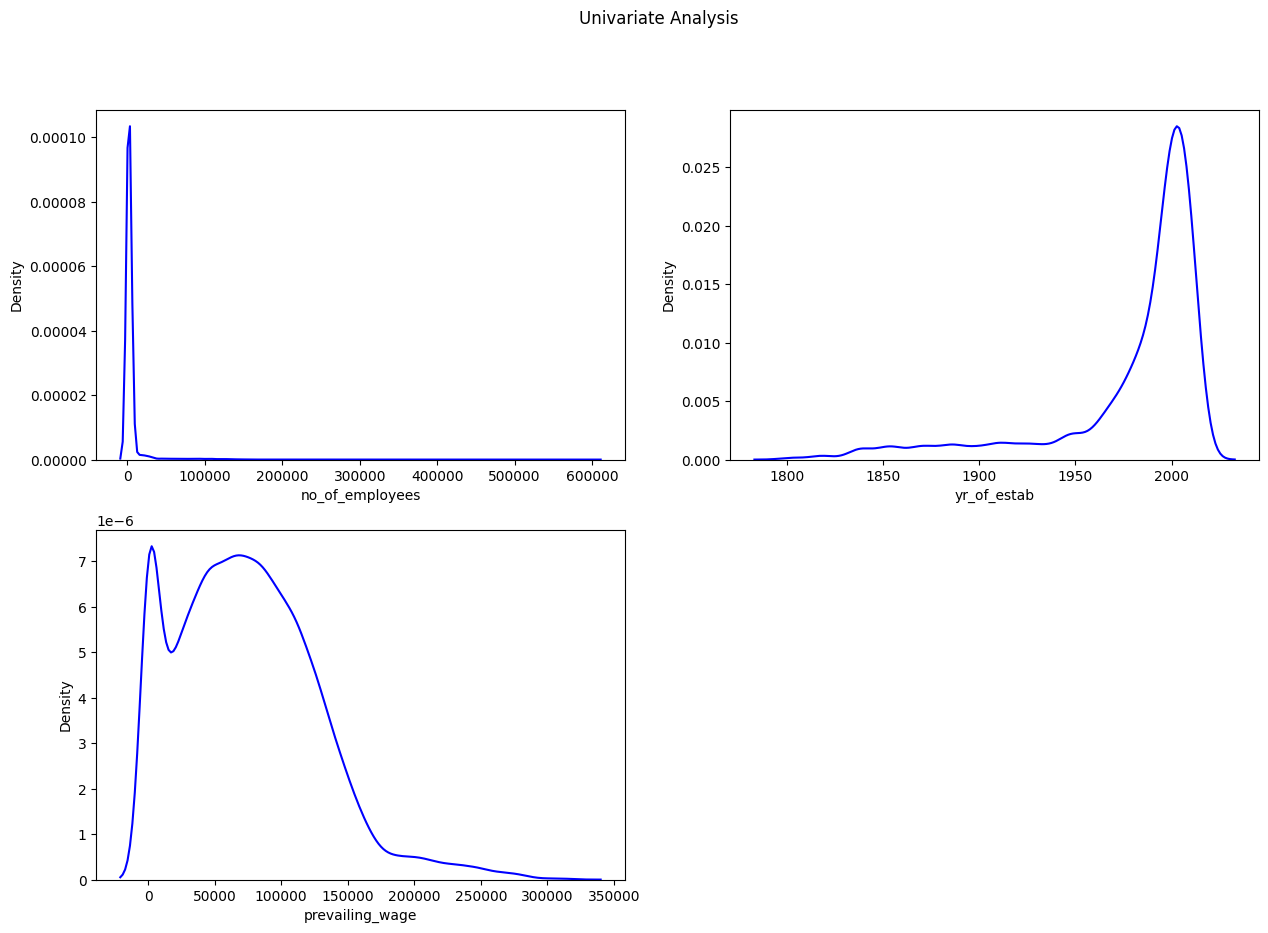

In [15]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis')

for i in range(0,len(numerical)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical[i]],color='blue')
    plt.xlabel(numerical[i])
    plt.tight_layout

# univariate analysis of categorical features

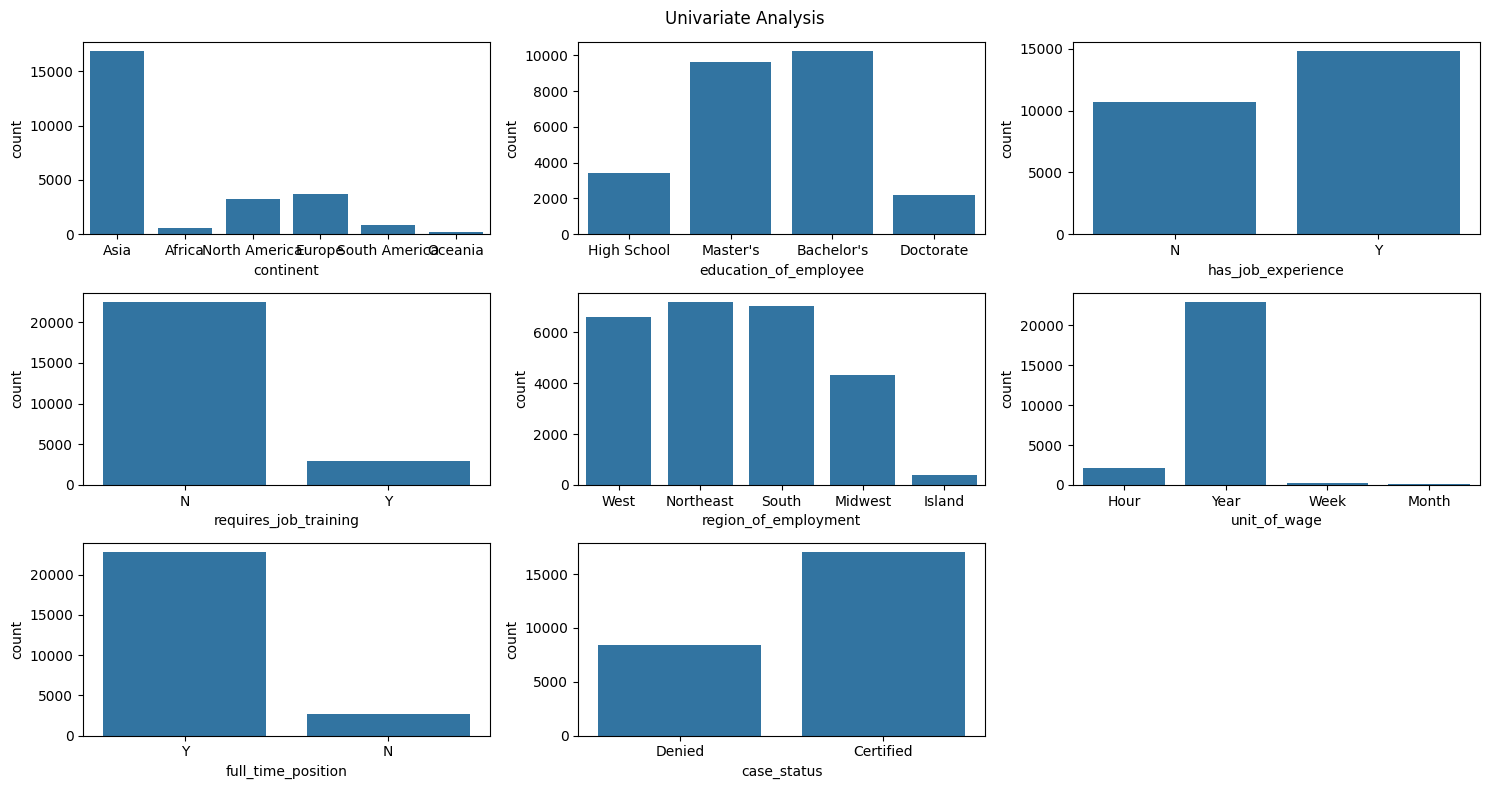

In [30]:
# Remove 'case_id' from the categorical list
#categorical.remove('case_id')

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and title
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis')

# Iterate over the categorical variables and plot count plots
for i in range(len(categorical)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[categorical[i]])
    plt.xlabel(categorical[i])

# Adjust layout for better spacing
plt.tight_layout()

# check multi collinearity

In [31]:
from scipy.stats import chi2_contingency

chi2_test=[]

for feature in categorical:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]<0.05:
        chi2_test.append('reject null hypothesis')  
    else :
        chi2_test.append('fail to reject null hypothesis')    
result=pd.DataFrame(data=[categorical,chi2_test]).T
result.columns=['Columns','Hypotesis Result']
result

,Columns,Hypotesis Result
0,continent,reject null hypothesis
1,education_of_employee,reject null hypothesis
2,has_job_experience,reject null hypothesis
3,requires_job_training,fail to reject null hypothesis
4,region_of_employment,reject null hypothesis
5,unit_of_wage,reject null hypothesis
6,full_time_position,reject null hypothesis
7,case_status,reject null hypothesis


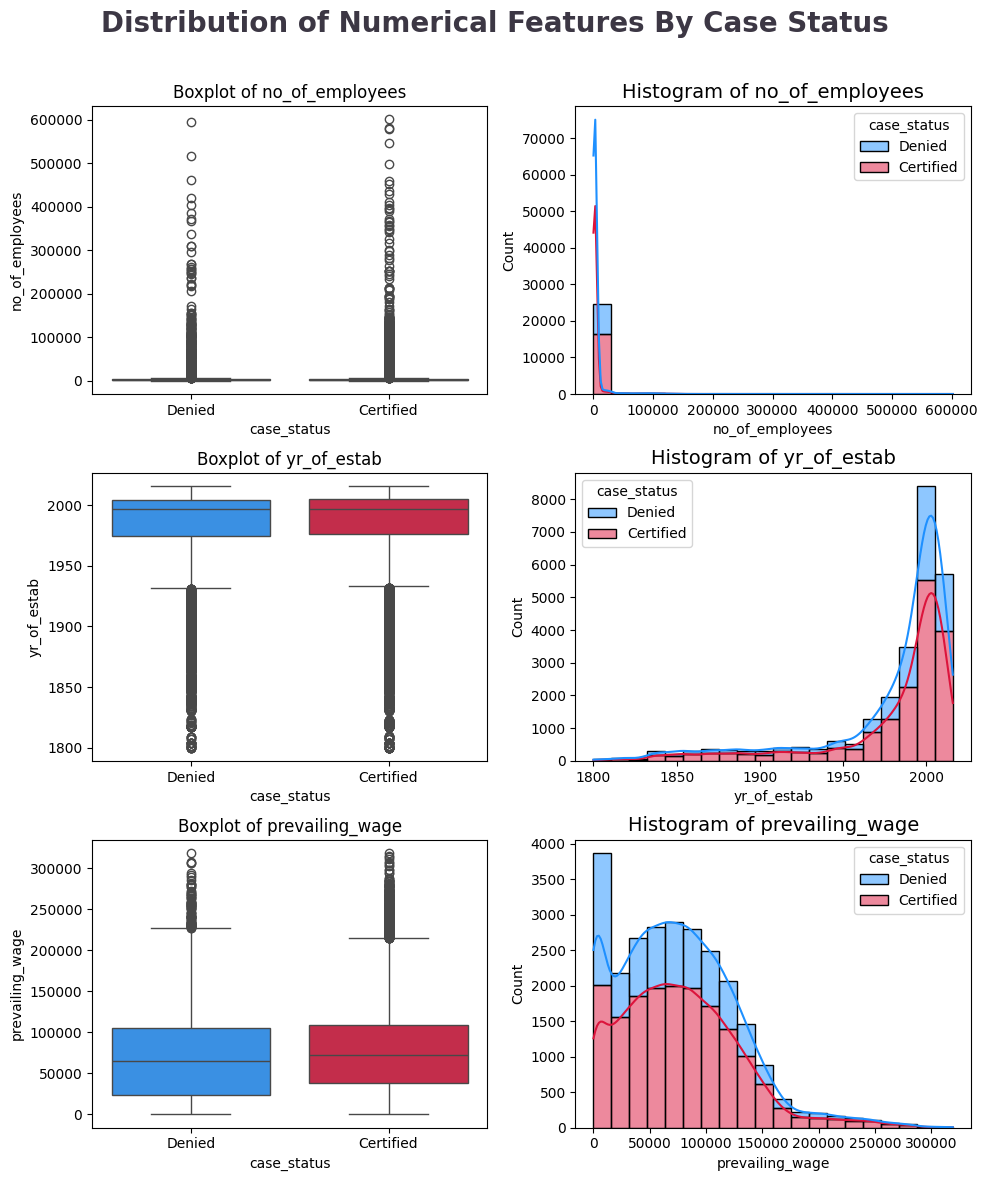

In [45]:

clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

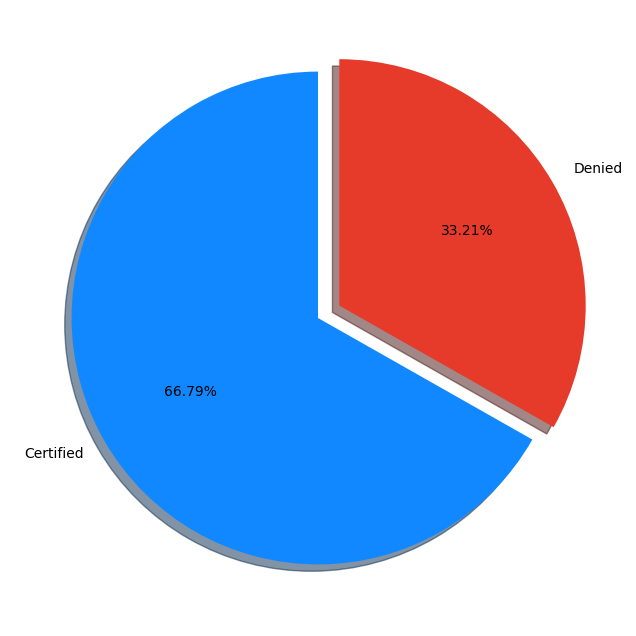

In [38]:
percentage=df.case_status.value_counts(normalize=True)*100
labels =["Certified","Denied"]

fig,ax=plt.subplots(figsize=(15,8))
explode=(0,0.1)

color=['#1188ff','#e63a2a']
ax.pie(percentage,explode=explode,labels=labels,colors=color,autopct='%2.2f%%',shadow=True,startangle=90)
plt.show()


In [41]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

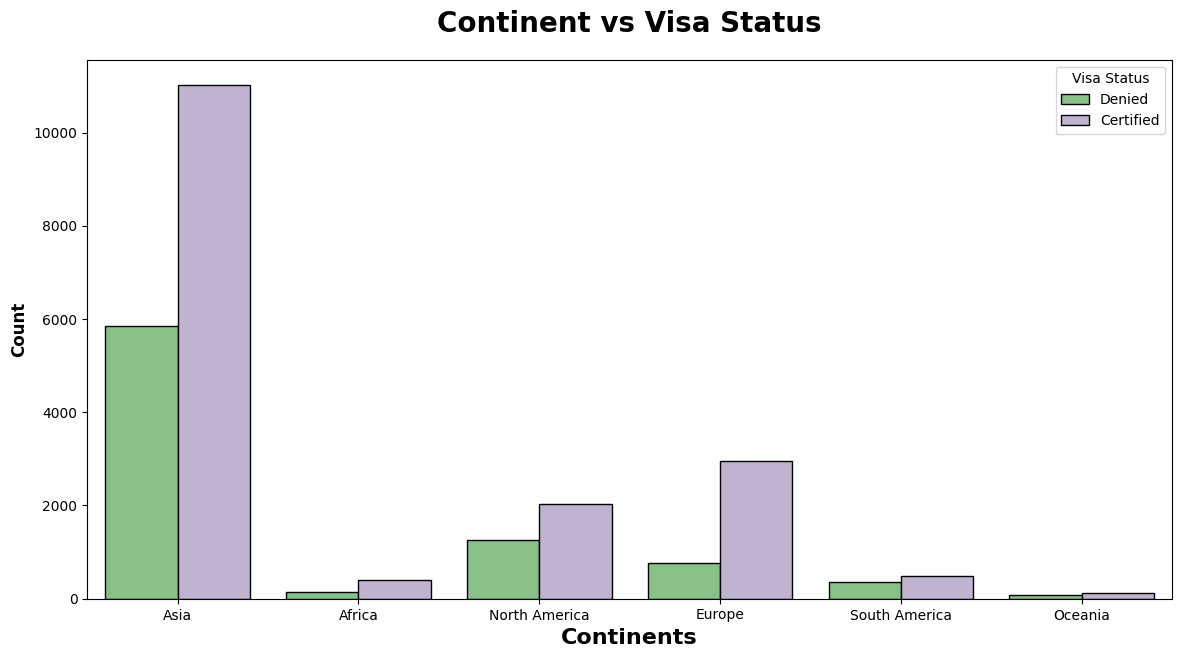

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [42]:
df.groupby('continent')['education_of_employee'].value_counts(normalize=True).to_frame()*100

proportion
continent     education_of_employee            
Africa        Master's                52.268603
              Bachelor's              25.952813
              High School             11.978221
              Doctorate                9.800363
Asia          Bachelor's              42.512307
              Master's                38.431884
              High School             13.581638
              Doctorate                5.474171
Europe        Bachelor's              34.807074
              Master's                29.394427
              Doctorate               22.668810
              High School             13.129689
North America Master's                42.770352
              Bachelor's              37.211422
              High School             12.181045
              Doctorate                7.837181
Oceania       Master's                35.416667
              Bachelor's              34.375000
              High School             18.750000
              Doctorate               11.458333
South America Bachelor's              39.084507
              Master's                34.389671
              High School             16.079812
              Doctorate               10.446009

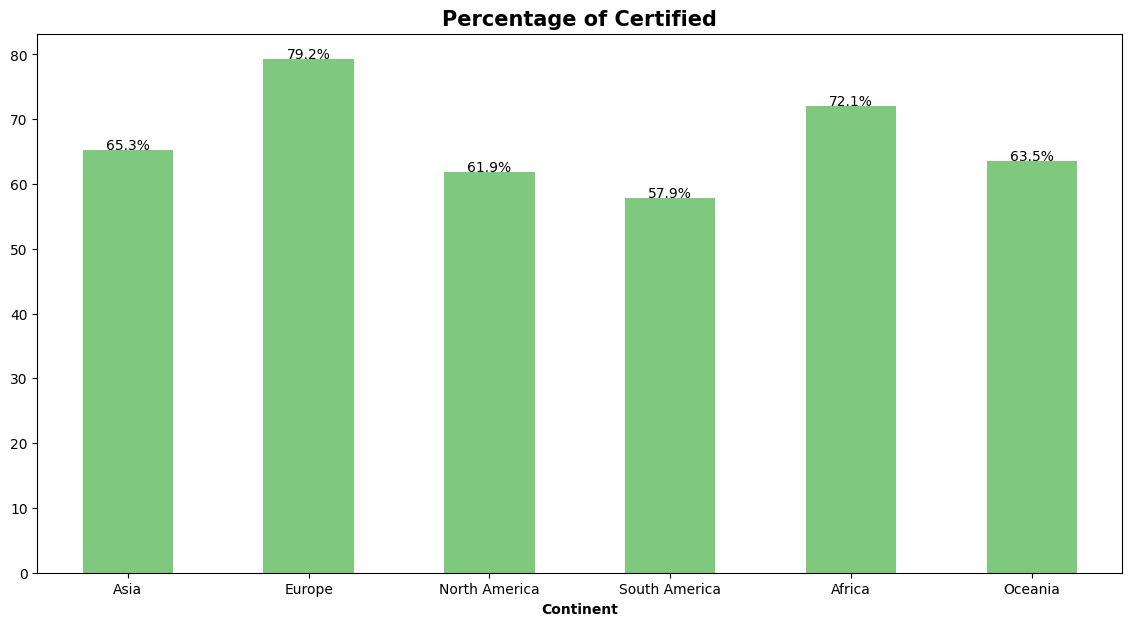

In [48]:
df2 = df.copy()

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

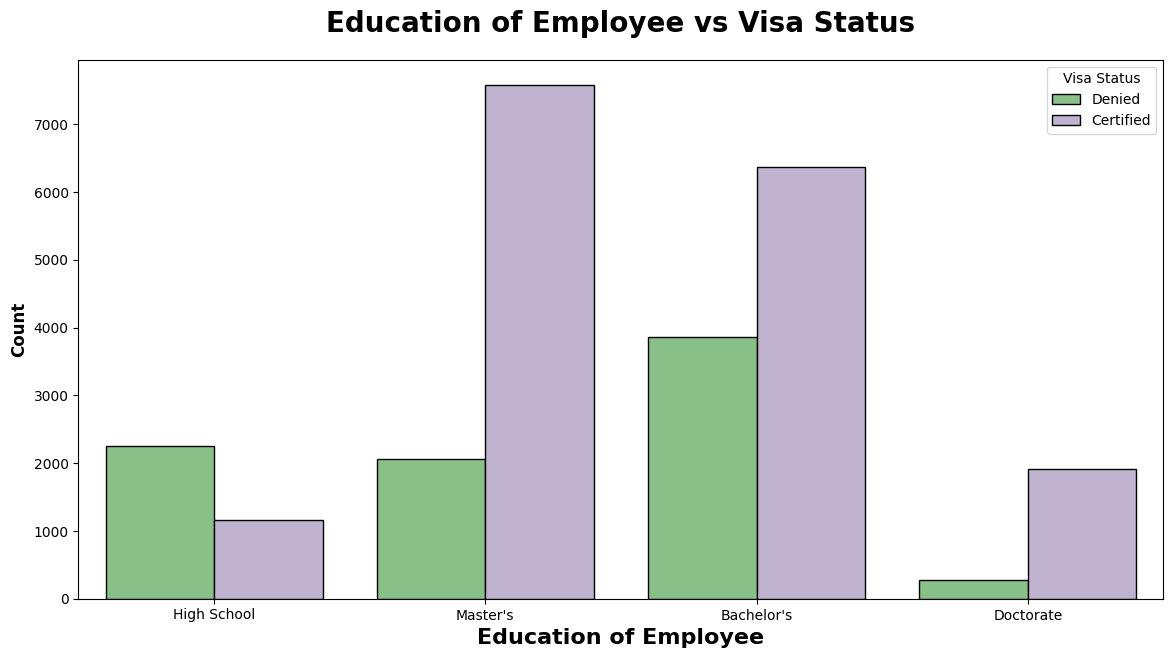

In [49]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [50]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

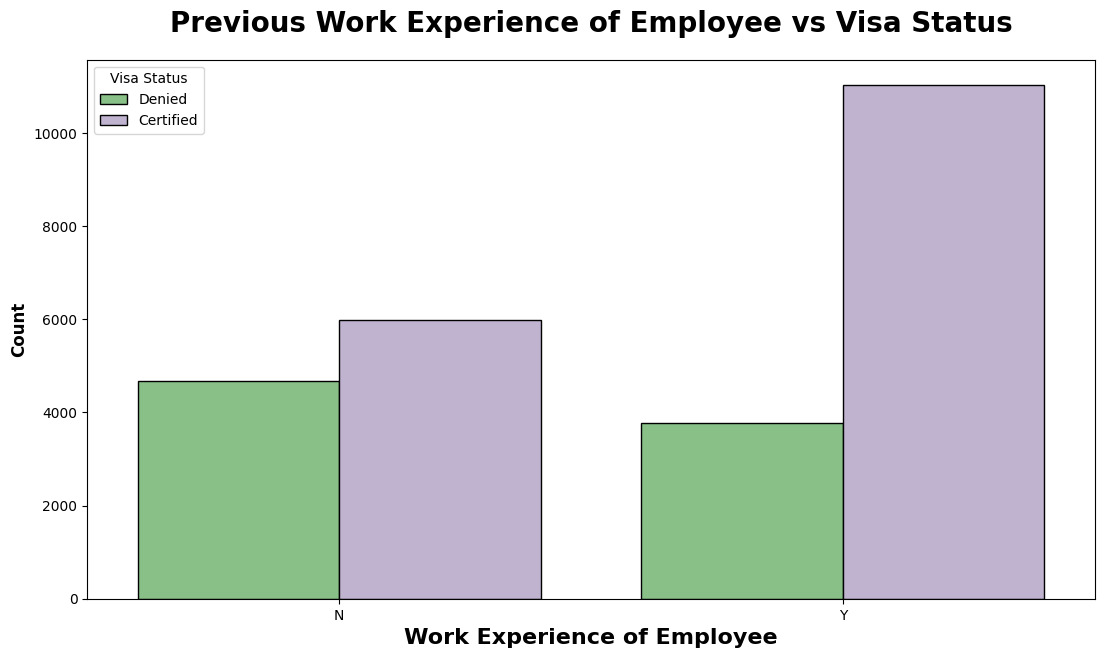

In [51]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [52]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

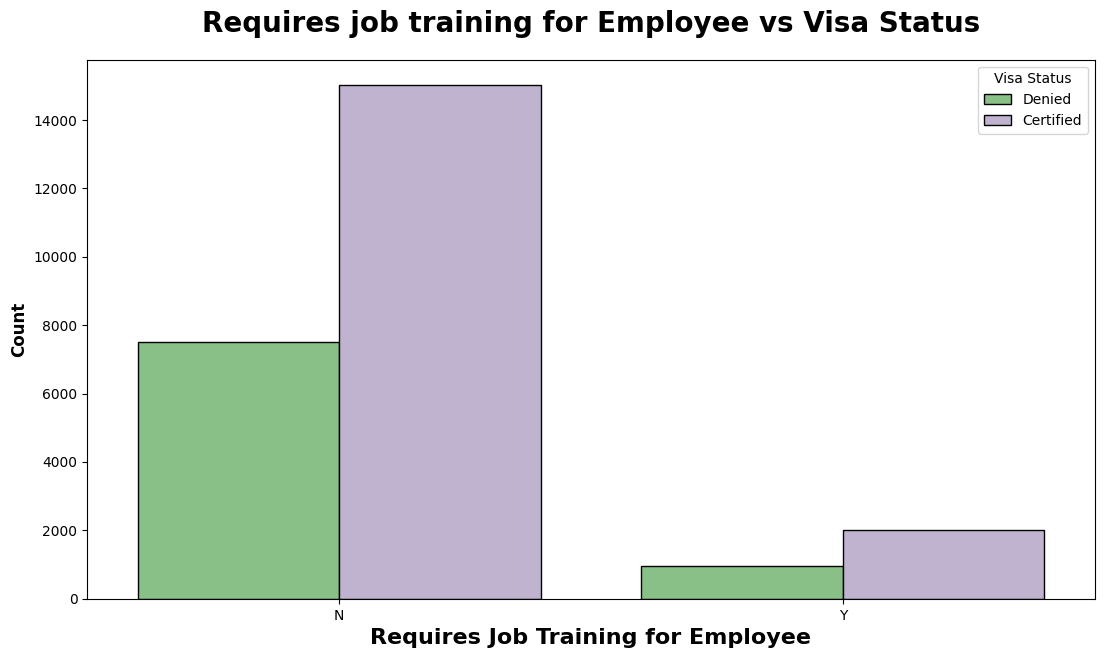

In [53]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [54]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)


unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

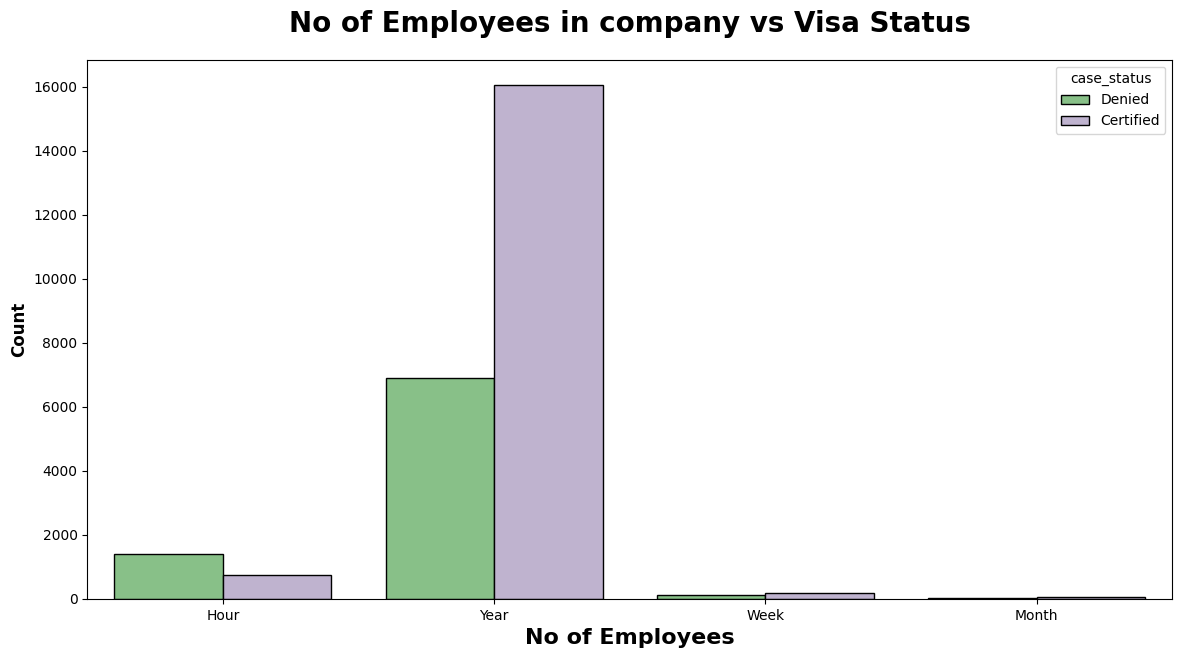

In [55]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

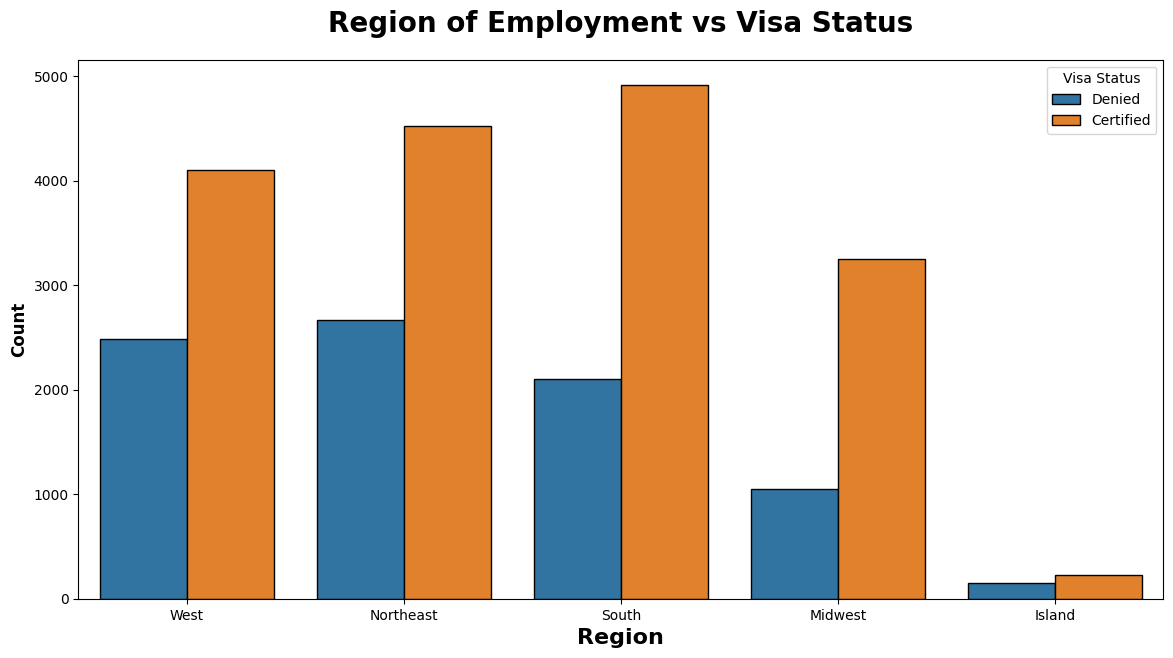

In [56]:

plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [57]:
df.groupby('prevailing_wage').case_status.value_counts()


prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

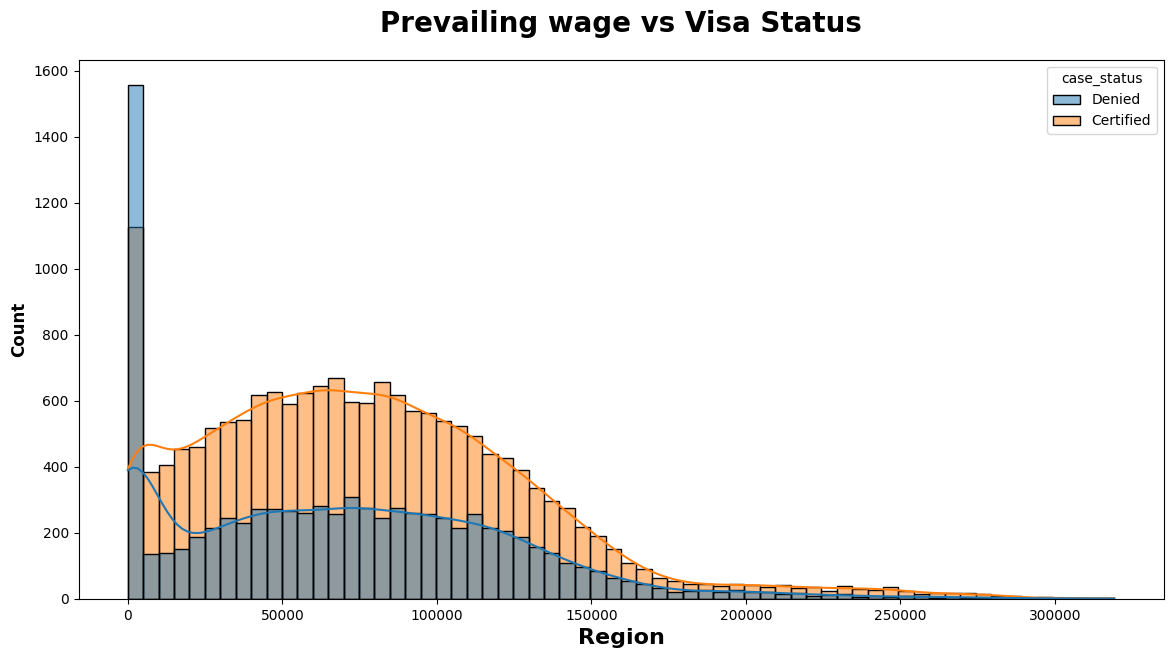

In [58]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()